In [20]:
# 01 - Exploración inicial de datos

In [21]:
## 1. Carga de librerías

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

# Estilos de visualización
sns.set(style="whitegrid")

In [23]:
## 2. Carga del dataset

In [24]:
ruta_temp = "../data/raw/global_temperature.csv"
df_temp = pd.read_csv(ruta_temp, skiprows=4)  # puede variar según el archivo exacto
df_temp.head()

,Year,Anomaly
0,1850,-0.08
1,1851,-0.14
2,1852,0.11
3,1853,0.01
4,1854,-0.06


In [25]:
ruta_co2 = "../data/raw/co2_monthly.csv"

# Leer el archivo saltando los comentarios iniciales (#)
df_co2 = pd.read_csv(ruta_co2, comment='#')

# Revisar los nombres automáticos de columnas
print(df_co2.columns)
df_co2.head()


Index(['year', 'month', 'decimal date', 'average', 'deseasonalized', 'ndays',
       'sdev', 'unc'],
      dtype='object')


,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99


In [55]:
# 1. Crear columna fecha como antes
df_co2["date"] = pd.to_datetime(df_co2["year"].astype(str) + "-" + df_co2["month"].astype(str), errors='coerce')

# 2. Reordenar columnas si quieres tener 'date' al final (opcional)
cols = [col for col in df_co2.columns if col != "date"] + ["date"]
df_co2 = df_co2[cols]

# 3. Establecer 'date' como índice
df_co2.set_index("date", inplace=True)

# 4. Visualizar
print(df_co2.columns)
df_co2.head()



Index(['index', 'year', 'month', 'decimal date', 'average', 'deseasonalized',
       'ndays', 'sdev', 'unc'],
      dtype='object')


,index,year,month,decimal date,average,deseasonalized,ndays,sdev,unc
date,,,,,,,,,
1958-03-01,0,1958,3,1958.2027,315.71,314.44,-1,-9.99,-0.99
1958-04-01,1,1958,4,1958.2877,317.45,315.16,-1,-9.99,-0.99
1958-05-01,2,1958,5,1958.3699,317.51,314.69,-1,-9.99,-0.99
1958-06-01,3,1958,6,1958.4548,317.27,315.15,-1,-9.99,-0.99
1958-07-01,4,1958,7,1958.5370,315.87,315.20,-1,-9.99,-0.99


In [63]:
#Guardar versión limpia del dataset
df_temp.to_csv("../data/clean/global_temperature_clean.csv", index=False)
df_co2 = df_co2.reset_index(names="date") #esto es para que la fecha no sea el índice al guardar
df_co2.to_csv("../data/clean/co2_clean.csv", index=False) #guardar el dataset limpio con 'date' visible

In [64]:
print(df_temp.head())
print(df_co2.head())

print(df_temp.info())
print(df_co2.info())


   Year  Anomaly
0  1850    -0.08
1  1851    -0.14
2  1852     0.11
3  1853     0.01
4  1854    -0.06
        date  index  year  month  decimal date  average  deseasonalized  \
0 1958-03-01      0  1958      3     1958.2027   315.71          314.44   
1 1958-04-01      1  1958      4     1958.2877   317.45          315.16   
2 1958-05-01      2  1958      5     1958.3699   317.51          314.69   
3 1958-06-01      3  1958      6     1958.4548   317.27          315.15   
4 1958-07-01      4  1958      7     1958.5370   315.87          315.20   

   ndays  sdev   unc  
0     -1 -9.99 -0.99  
1     -1 -9.99 -0.99  
2     -1 -9.99 -0.99  
3     -1 -9.99 -0.99  
4     -1 -9.99 -0.99  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 176 entries, 0 to 175
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     176 non-null    int64  
 1   Anomaly  176 non-null    float64
dtypes: float64(1), int64(1)
memory usage: 2.9 KB
Non

In [65]:
df_co2 = pd.read_csv("../data/clean/co2_clean.csv")
df_co2["date"] = pd.to_datetime(df_co2["date"])
df_co2.set_index("date", inplace=True)


In [28]:
## 3. Inspección inicial de los datos - EDA (Exploratory Data Analysis)

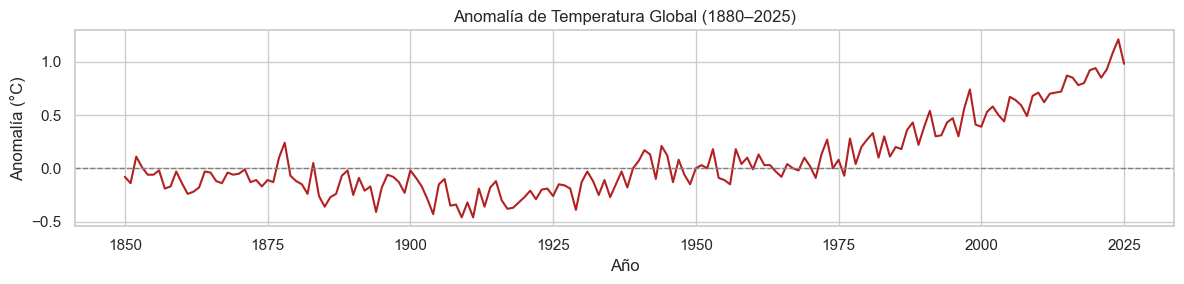

In [68]:
plt.figure(figsize=(12, 3))
sns.lineplot(data=df_temp, x="Year", y="Anomaly", color='firebrick')
plt.title("Anomalía de Temperatura Global (1880–2025)")
plt.xlabel("Año")
plt.ylabel("Anomalía (°C)")
plt.axhline(0, color="gray", linestyle="--", linewidth=1)
plt.grid(True)
plt.tight_layout()
plt.show()


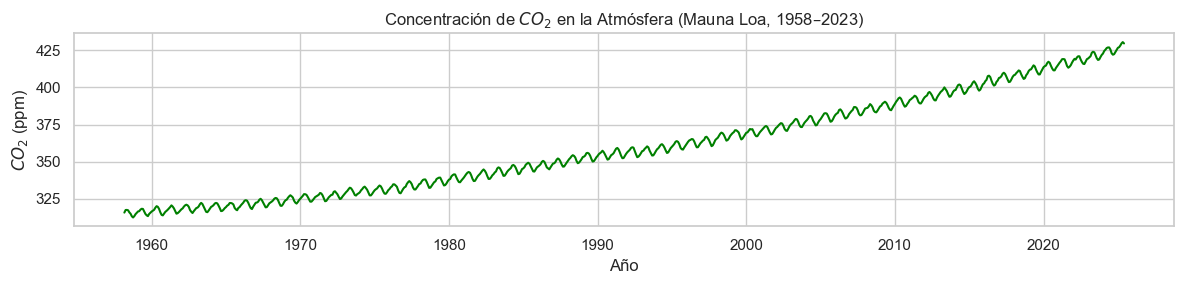

In [71]:
plt.figure(figsize=(12, 3))
sns.lineplot(data=df_co2, x=df_co2.index, y="average", color='green')
plt.title("Concentración de $CO_2$ en la Atmósfera (Mauna Loa, 1958–2023)")
plt.xlabel("Año")
plt.ylabel("$CO_2$ (ppm)")
plt.grid(True)
plt.tight_layout()
plt.show()


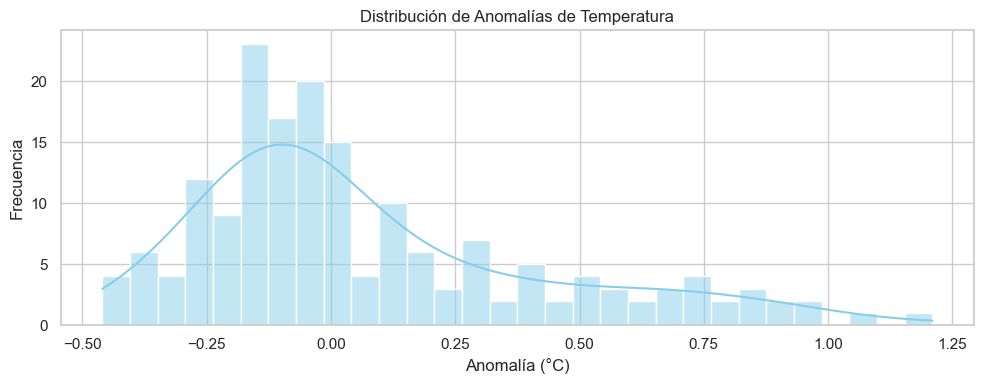

In [69]:
plt.figure(figsize=(10, 4))
sns.histplot(df_temp["Anomaly"], kde=True, color="skyblue", bins=30)
plt.title("Distribución de Anomalías de Temperatura")
plt.xlabel("Anomalía (°C)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


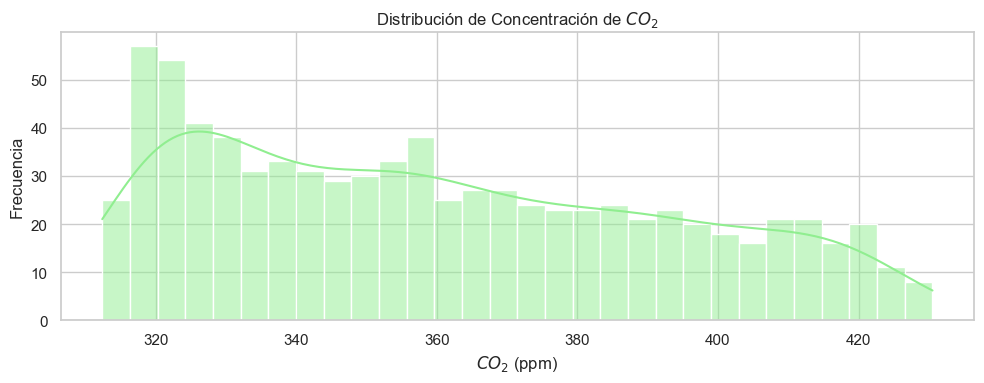

In [70]:
plt.figure(figsize=(10, 4))
sns.histplot(df_co2["average"], kde=True, color="lightgreen", bins=30)
plt.title("Distribución de Concentración de $CO_2$")
plt.xlabel("$CO_2$ (ppm)")
plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()


In [72]:
#Agrupar CO2 por año (promedio anual)
df_co2_anual = df_co2.groupby("year")["average"].mean().reset_index()
df_co2_anual.rename(columns={"average": "co2_avg"}, inplace=True)

In [73]:
#Combinar con el dataset de temperatura
df_comb = pd.merge(df_temp, df_co2_anual, left_on="Year", right_on="year", how="inner")
df_comb.drop(columns=["year"], inplace=True)  # opcional, ya tenemos 'Year'
df_comb.head()


,Year,Anomaly,co2_avg
0,1958,0.04,315.237000
1,1959,0.10,315.981667
2,1960,-0.01,316.908333
3,1961,0.13,317.643333
4,1962,0.03,318.453333


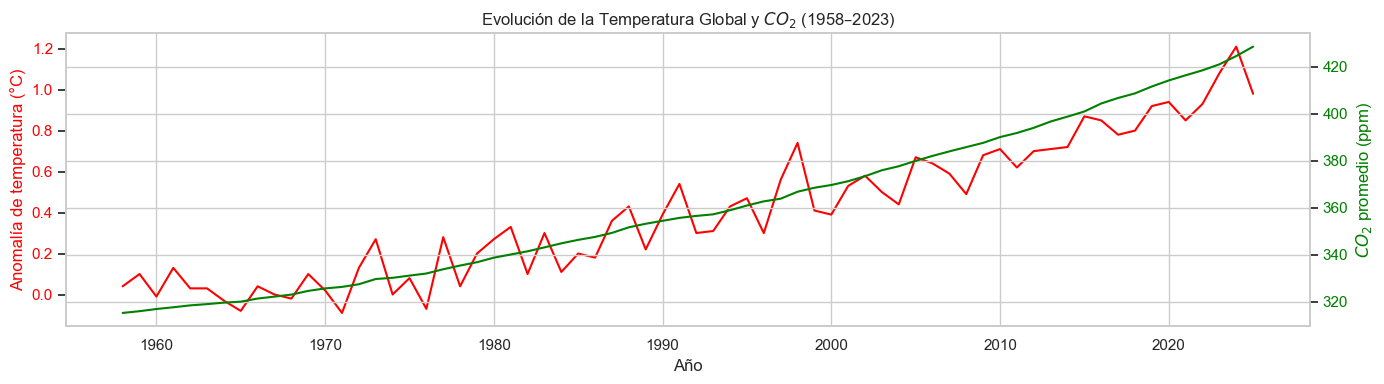

In [95]:
# Visualización de la comparación de temperatura y CO₂
fig, ax1 = plt.subplots(figsize=(14, 4))

# Eje Y izquierdo: temperatura
color_temp = "red"
ax1.set_xlabel("Año")
ax1.set_ylabel("Anomalía de temperatura (°C)", color=color_temp)
ax1.plot(df_comb["Year"], df_comb["Anomaly"], color=color_temp, label="Temperatura")
ax1.tick_params(axis='y', labelcolor=color_temp)
ax1.grid(axis='y', visible=False)  # Oculta líneas horizontales (eje Y)

# Eje Y derecho: CO₂
ax2 = ax1.twinx()
color_co2 = "green"
ax2.set_ylabel("$CO_2$ promedio (ppm)", color=color_co2)
ax2.plot(df_comb["Year"], df_comb["co2_avg"], color=color_co2, label="CO₂")
ax2.tick_params(axis='y', labelcolor=color_co2)

# Título y diseño
plt.title("Evolución de la Temperatura Global y $CO_2$ (1958–2023)")
fig.tight_layout()
plt.grid(True)
plt.show()

#usamos este metodo para que la escala de CO2 no eclipse a la anomalía de temperatura aplastando la gráfica, por ello usarermos dos ejes y


In [ ]:
#Cakcular la correlación entre CO₂ y anomalía de temperatura
corr = df_comb["Anomaly"].corr(df_comb["co2_avg"])
print(f"📊 Correlación entre CO₂ y anomalía de temperatura: {corr:.3f}")
#🔹 Si da >0.85, hay una fuerte correlación positiva
#🔸 Si da entre 0.5–0.8, es moderada pero consistente
#🔻 Si es muy baja (<0.3), no hay correlación clara

📊 Correlación entre CO₂ y anomalía de temperatura: 0.957


In [97]:
df_comb.to_csv("../data/clean/df_comb.csv", index=False)


In [ ]:
## 4. Limpieza básica de los datos